In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import signal
from scipy.fft import fft # fast fourier transform
from scipy.io import wavfile
import seaborn as sns; sns.set()
""" The objective of this is to find the full spectrogram, since the HPS approach is currently not working.""";

IMPORTING FILE

Audio data shape is
(141120,)


Text(0.5, 1.0, 'Audio signal in time')

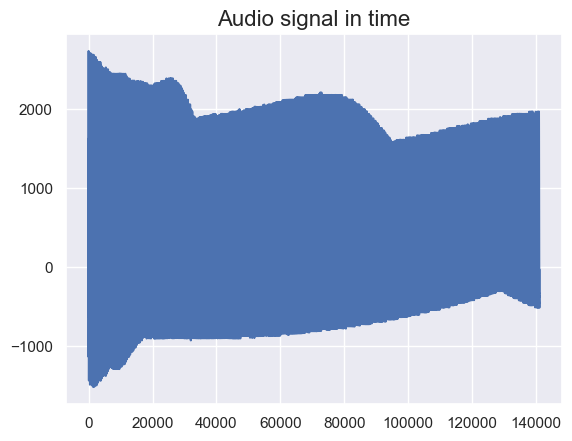

In [2]:
""" Note: Each sample in my set releases the note halfway.
False -> we train with the release behavior (not a good idea).
True -> we don't, and we only use the first half of each sample.
"""
dont_use_release = True

SampleName = "01 - [Prologue]_0.wav" # Audio File
os.chdir('..')
os.chdir('./wav/')
SampleRate, Audiodata = wavfile.read(SampleName)

if dont_use_release:
    Audiodata = Audiodata[0:len(Audiodata)//2]

print('Audio data shape is') #Old shape was (35280,2)
print(np.shape(Audiodata))

# Plot the audio signal in time
plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)

FAST FOURIER TRANSFORM \& SPECTRUM (WITHOUT FINDING FUNDAMENTAL FREQUENCY)

(129, 629)


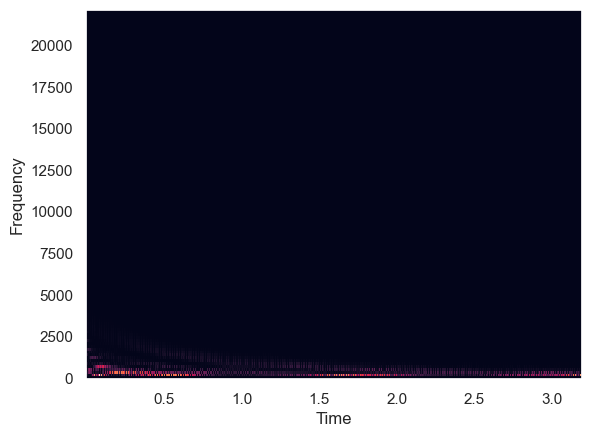

In [3]:
# For this approach, use available Python packages to extract full spectrogram.
# Will likely use a CNN to mind the "shifts" in frequencies caused by pitch.
# Note: The mel scale is based on the idea that
# scale distance ~= perceptual distance. Don't have to use it for ML.

use_mel_scale = False

frequencies, times, spectrogram = signal.spectrogram(Audiodata, SampleRate)
print(np.shape(spectrogram))
if use_mel_scale:
    frequencies = 2595 * np.log(1 + frequencies/500)

plt.pcolormesh(times, frequencies, spectrogram)
#plt.imshow(spectrogram)
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

In [4]:
print(frequencies)
print(times)

[    0.         172.265625   344.53125    516.796875   689.0625
   861.328125  1033.59375   1205.859375  1378.125     1550.390625
  1722.65625   1894.921875  2067.1875    2239.453125  2411.71875
  2583.984375  2756.25      2928.515625  3100.78125   3273.046875
  3445.3125    3617.578125  3789.84375   3962.109375  4134.375
  4306.640625  4478.90625   4651.171875  4823.4375    4995.703125
  5167.96875   5340.234375  5512.5       5684.765625  5857.03125
  6029.296875  6201.5625    6373.828125  6546.09375   6718.359375
  6890.625     7062.890625  7235.15625   7407.421875  7579.6875
  7751.953125  7924.21875   8096.484375  8268.75      8441.015625
  8613.28125   8785.546875  8957.8125    9130.078125  9302.34375
  9474.609375  9646.875     9819.140625  9991.40625  10163.671875
 10335.9375   10508.203125 10680.46875  10852.734375 11025.
 11197.265625 11369.53125  11541.796875 11714.0625   11886.328125
 12058.59375  12230.859375 12403.125    12575.390625 12747.65625
 12919.921875 13092.1875   